# Clayton Seabaugh: Machine Learning Final Project
**Author:** Clayton Seabaugh  
**Date:** 4-20-2025  
**Objective:** This project demonstrates my ability to apply regression modeling techniques to a real-world dataset
- Load and explore a dataset
- Choose and justify features for predictign a target variable
- Train a regression model and evaluate performance
- Compare multiple regression approaches

## Section 1: Imports and Inspect the Data

### Section 1.1: Import modules and inspect first 10 rows

In [2]:
# Imports needed
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os


In [4]:
# Create file path for data and print head
file_path = 'data/insurance.csv'
if os.path.exists(file_path):
    # Read and print df
    df = pd.read_csv(file_path)
    print(df.head(10))
else:
    print(f"File {file_path} does not exist.")

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


### Section 1.2: Check for missing values and display summary statistics

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values in each Column:\n{missing_values}")

# Generate summary statistics
summary_stats = df.describe()
print (f"Summary Statistics:\n{summary_stats}")

Missing Values in each Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Reflection 1: 
- There are 7 columns: age, sex, bmi, children, smoker, region, charges
- 3 Columns are categorical (sex, smoker, and region) and 4 are numerical(age, bmi, children, charges)
- There is a wide range of charges from 1121.87 min and 63770 max
- There are no null values in any of the columns and no data issues

## Section 2: Data Exploration and Preparation

### Section 2.1: Explore data patterns and distributions

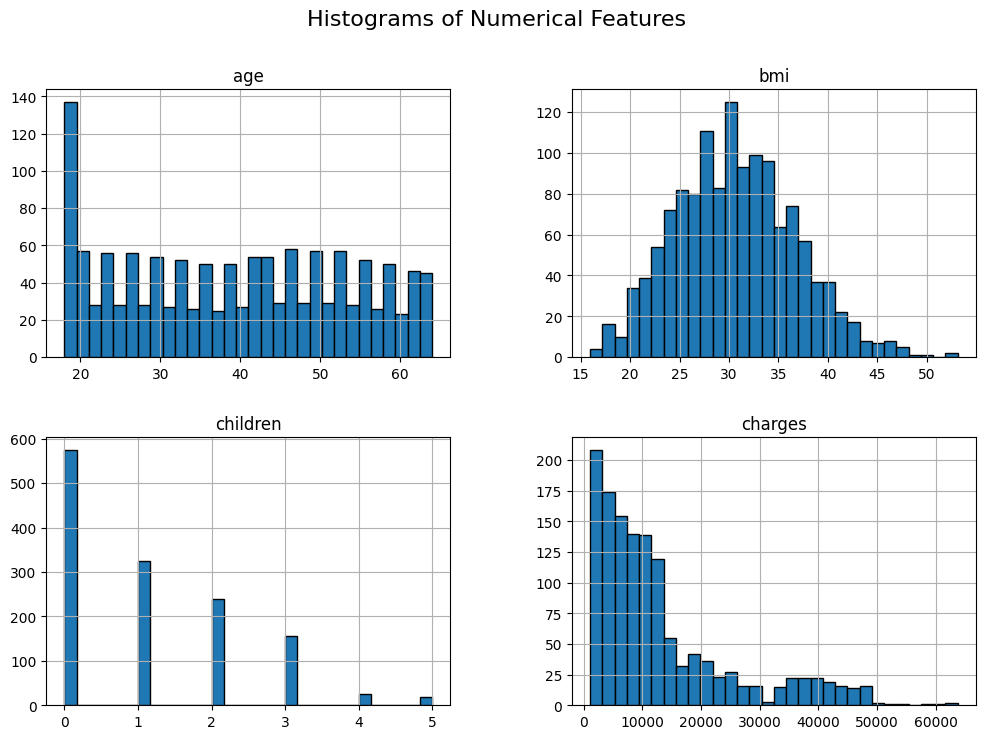

In [6]:
# Numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Histograms
df[num_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

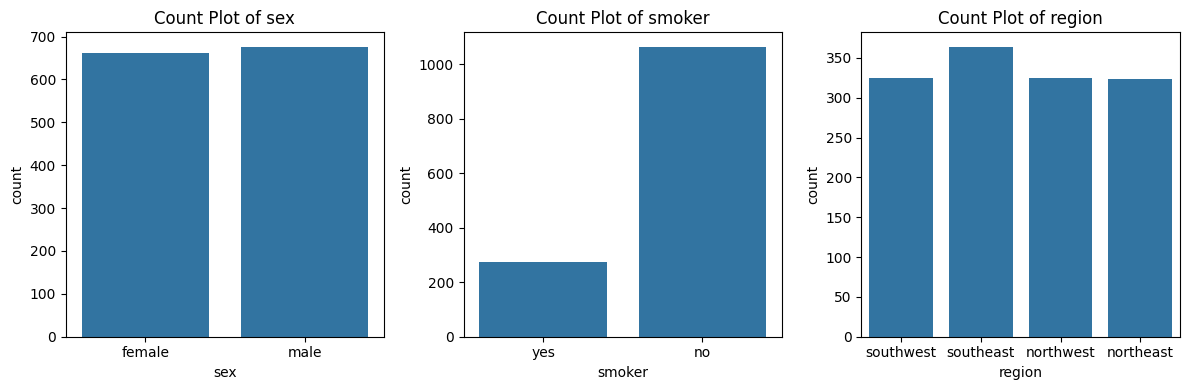

smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64
region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64


In [8]:
# Categorical variables
cat_cols = ['sex', 'smoker', 'region']

plt.figure(figsize=(12,4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

print(df['smoker'].value_counts(normalize=True))
print(df['region'].value_counts(normalize=True))

### Section 2.2: Handle Missing Values and Clean Data

In [11]:
# Double check if any null values
print(df.isnull().sum())

# Remove outliers in charges using IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['charges'] >= Q1 - 1.5 * IQR) & (df['charges'] <= Q3 + 1.5 * IQR)]

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
